# Classificatie - Logistic Regression

## Wat is classificatie?

Bij regressie wordt er getracht een manier te zoeken om op basis van een aantal inputs/features een continue waarde te voorspellen.
Bij classificatie omvat machine learning technieken waar een model getrained wordt dat op basis van de input bepaalt in welke categorieen je input thuishoort.
Een model dat een categorie toekent aan een bepaalde set input-data kan ook een **classifier** genoemd worden.
Het classificatieprobleem hoort nog steeds thuis onder **supervised learning** omdat er nog steeds gebruikt gemaakt wordt van een output/label/target om het model te trainen.

Enkele voorbeelden van classificatieproblemen zijn
* Spam detectie
* Medische diagnoses
* Kwaliteitscontrole
* Geschreven tekst inlezen
* ...


## Types van classifiers

Op basis van hoe de data gelabeled wordt kunnen we drie types van classifiers onderscheiden:
* Binaire classifier: Er zijn twee verschillende klasses (goedgekeurd of niet, kwaadaardig vs goedaardig, ...). Lijkt simplistisch maar komt heel veel voor.
* Multiclass classifier: Er zijn een willekeurig aantal klassen en er kan er maar 1 toegekend worden. Een voorbeeld hiervan is gezichtsherkenning (elk gezicht kan maar bij 1 persoon horen).
* Multilabel classifier: Er zijn een willekeurig aantal klassen en 1 input kan tot meerdere klassen behoren, bijvoorbeeld op een foto kan je meerdere zaken herkennen zoals een boom, wolken, gras, struiken, dieren, ...

## Kan hier ook lineaire regressie gebruikt worden?

Een eerste mogelijkheid om classificatie uit te voeren is om elke klasse een apart getal te geven en dan lineaire regressie uit te voeren.
Hierdoor bekomen we een getal en dan kunnen we kijken naar welk cijfer/klasse er het dichts bij licht.
De problemen met deze aanpak kunnen het makkelijkst worden toegelicht doorm iddel van een voorbeeld.
Doorheen deze notebook gaat er grotendeels gewerkt worden met [deze dataset](https://www.kaggle.com/elakiricoder/gender-classification-dataset) die 7 zaken gemeten heeft in het gezicht van zowel mannen als vrouwen.
Deze dataset gaan we gebruiken om op basis van deze metingen te gaan bepalen of de bijhorende persoon een vrouw of man is.

In [5]:
# imports
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import opendatasets as od

import seaborn as sns

# sklearn
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OneVsRestClassifier

%matplotlib inline

In [ ]:
od.download("https://www.kaggle.com/joshmcadams/oranges-vs-grapefruit")

In [2]:
df = pd.read_csv(".\\oranges-vs-grapefruit\\citrus.csv")

In [3]:
df["output"] = df.name == "orange"
df

,name,diameter,weight,red,green,blue,output
0,orange,2.96,86.76,172,85,2,True
1,orange,3.91,88.05,166,78,3,True
2,orange,4.42,95.17,156,81,2,True
3,orange,4.47,95.60,163,81,4,True
4,orange,4.48,95.76,161,72,9,True
...,...,...,...,...,...,...,...
9995,grapefruit,15.35,253.89,149,77,20,False
9996,grapefruit,15.41,254.67,148,68,7,False
9997,grapefruit,15.59,256.50,168,82,20,False
9998,grapefruit,15.92,260.14,142,72,11,False


Waneer we nu een scatterplot tekenen van een kleine datasample en lineaire regressie zouden laten uitvoeren bekomen we onderstaand resultaat.
Voor classificatie zouden we beslissen dat wanneer het minder is dan de helft, dat het dan een orange is en anders pompelmoes.

C:\Users\jens.baetens3\AppData\Local\Temp\ipykernel_20656\1297535974.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_trimmed = df.groupby(["name"]).apply(split)
C:\Users\jens.baetens3\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


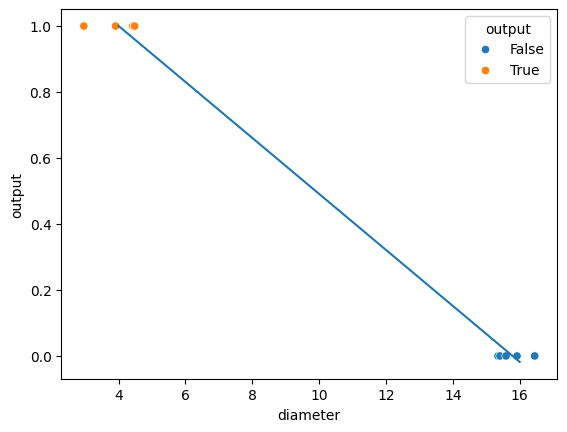

In [6]:
def split(group):
    s = group.sort_values("weight")
    if group.name == "orange":
        return s.head()
    return s.tail()
df_trimmed = df.groupby(["name"]).apply(split)

model = LinearRegression()
model.fit(pd.DataFrame(df_trimmed.diameter), df_trimmed.output)
x_test = [4, 16]
y_test = model.predict(pd.DataFrame(x_test))

sns.scatterplot(x = 'diameter', y ='output', data=df_trimmed, hue='output')
plt.plot(x_test, y_test)

Met deze plot zou je kunnen denken dat lineaire regressie kan gebruikt worden.
Daarom hebben we eens een andere groep ook geplot en daar zie je dat er toch een aantal problemen zijn met lineaire regressie te gebruiken voor classificatie.
* Outliers hebben een grote impact op de trendlijn en dus op de manier dat de classificatie gebeurd
* Als de ene klas 0 is en de andere 1, dan kunnen we waarden voorspellen die kleiner zijn dan 0 en groter dan 1. Dit komt niet overeen met kansen dus is het lastiger om te interpreteren. 
* Als de klassen niet gebalanceerd zijn kan het zijn dat er een grotere bias is voor de ene klassen. Dit wordt ook hieronder. aangetoond.

De combinatie van deze problemen zorgt ervoor dat lineaire regressie zelden een goede oplossing is voor classificatieproblemen.
Gelukkig bevat het domein van classificatie een hele hoop machine learning technieken die beter bestand zijn tegen deze problemen.
In de loop van de cursus gaan we er een aantal van bestuderen, namelijk:
* Logistic Regression
* SVM
* Naive Bayes
* Decision Trees
* Random Forest

C:\Users\jens.baetens3\AppData\Local\Temp\ipykernel_20656\1464119369.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_trimmed = df.groupby(["name"]).apply(split_outlier)
C:\Users\jens.baetens3\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


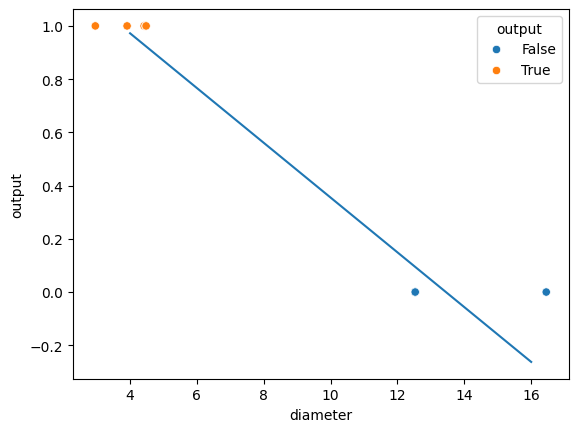

In [7]:
def split_outlier(group):
    s = group.sort_values("weight")
    if group.name == "orange":
        return s.head()
    return pd.concat([s.tail(1), s[-1000:-995]])
df_trimmed = df.groupby(["name"]).apply(split_outlier)

model = LinearRegression()
model.fit(pd.DataFrame(df_trimmed.diameter), df_trimmed.output)
x_test = [4, 16]
y_test = model.predict(pd.DataFrame(x_test))

sns.scatterplot(x = 'diameter', y ='output', data=df_trimmed, hue='output')
plt.plot(x_test, y_test)

C:\Users\jens.baetens3\AppData\Local\Temp\ipykernel_20656\3849129172.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_trimmed = df.groupby(["name"]).apply(split_inbalanced)
C:\Users\jens.baetens3\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


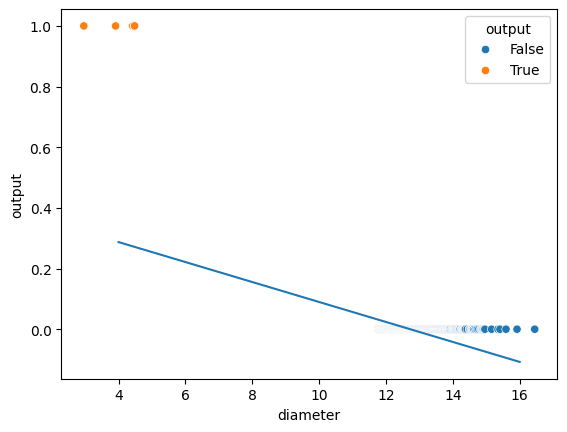

In [8]:
def split_inbalanced(group):
    s = group.sort_values("weight")
    if group.name == "orange":
        return s.head()
    return s.tail(2000)
df_trimmed = df.groupby(["name"]).apply(split_inbalanced)

model = LinearRegression()
model.fit(pd.DataFrame(df_trimmed.diameter), df_trimmed.output)
x_test = [4, 16]
y_test = model.predict(pd.DataFrame(x_test))

sns.scatterplot(x = 'diameter', y ='output', data=df_trimmed, hue='output')
plt.plot(x_test, y_test)

C:\Users\jens.baetens3\AppData\Local\Temp\ipykernel_20656\1722621674.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_trimmed = df.groupby(["name"]).apply(split_inbalanced)
C:\Users\jens.baetens3\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


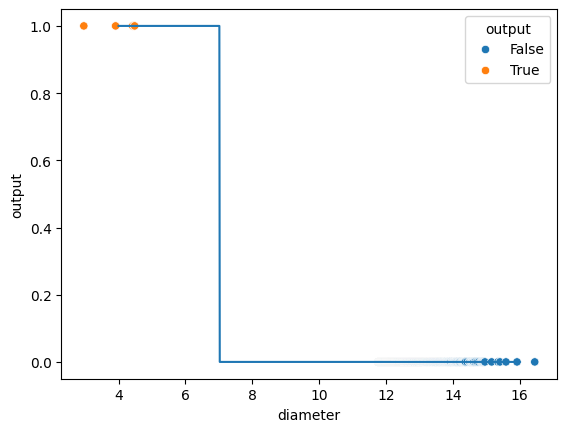

In [9]:
def split_inbalanced(group):
    s = group.sort_values("weight")
    if group.name == "orange":
        return s.head()
    return s.tail(2000)
df_trimmed = df.groupby(["name"]).apply(split_inbalanced)

################# Hier staat de code voor logistische regressie toe te passen -> identiek dezelfde stappen als daarjuist
model = LogisticRegression(penalty=None)
model.fit(pd.DataFrame(df_trimmed.diameter), df_trimmed.output)
x_test = np.linspace(4,16,1000)
y_test = model.predict(pd.DataFrame(x_test))

sns.scatterplot(x = 'diameter', y ='output', data=df_trimmed, hue='output')
plt.plot(x_test, y_test)

## Evaluatie van classificatie

In tegenstelling tot lineaire regressie kunnen we niet de afstand tot de gewenste output gebruiken om verschillende classifiers te gaan evalueren.
Een mogelijkheid die kan werken is om te kijken naar het percentage van inputs die correct geklassificieerd zijn.
Dit wordt ook de accuraatheid of accuracy genoemd.
Enkel deze metriek gebruiken heeft echter problemen bij het classificieren van zeldzame events of niet-gebalanceerde data.
Een classifier zou bijvoorbeeld voor iets dat in maar 1 van de 1000 gevallen voorkomt kunnen voorspellen dat het nooit voorkomt maar toch een accuraatheid bekomen van 99,9%.

Om dit op te vangen kan de zogenoemde [confusionmatrix](https://towardsdatascience.com/confusion-matrix-for-your-multi-class-machine-learning-model-ff9aa3bf7826) bepaald worden.
Hierin wordt bijgehouden voor elke klasse hoeveel voorspellingen er correct waren en hoeveel niet.
Op basis van deze matrix kunnen de volgende metrieken berekend worden:
* Accuraatheid: algemene correctheid $\frac{TP+TN}{TP+TN+FP+FN}$
* Precisie: Accuraatheid binnen positieve voorspellingen $\frac{TP}{TP+FP}$
* Specificiteit: Accuraatheid binnen negatieve samples $\frac{TN}{TN+FP}$
* Recall: Accuraatheid binnen positieve samples $\frac{TP}{TP+FN}$
* F1-score: Combinatie Precisie en Recall: $2\frac{Precisie*Recall}{Precisie+Recall} = \frac{2TP}{2TP+FP+FN}$

De [.score](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.score) functie van het LogisticRegression model berekent de accuraatheid van het model maar de andere metrieken kunnen een veel nauwkeuriger beeld geven over de correcte werken van het model.

![matrix](images/confusionMatrix.png)

## Multi-class classification

In het bovenstaande voorbeeld zijn de training examples onderverdeeld in twee klassen.
In de praktijk komt het ook vaak voor dat er meerdere klasses mogelijk zijn, zoals meerdere types fruit, meerdere soorten hondenrassen, ...
Om dit aan te pakken zijn er twee veelgebruikte technieken: One vs All en One vs One.
Meer informatie over hoe de LogisticRegression van sklearn kan gebruikt worden voor multi-class problemen op te lossen vind je [hier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).
Dan gaat het specifiek om het multi-class probleem.

### One vs All

Bij deze techniek maak 1 classifier per klasse die je hebt.
Deze classifier bepaalt of een input van die bepaalde klasse is of niet.
Met deze techniek worden er dus N classifiers getrained.
Het voordeel hiervan is dat er minder classifiers nodig zijn dan in de One-Vs-One-techniek waardoor het sneller te trainen is.
Het nadeel echter is dat de techniek gevoeliger is aan niet-gebalanceerde data.
Deze techniek wordt ook vaak One-Vs-The-Rest genoemd.

Een opmerking bij techniek is dat het mogelijk is dat twee of meerdere classifiers aangeven dat een input tot die klasse hoort.
In het geval dat er een dergelijk conflict opduikt wordt de klasse die de hoogste kans aangeeft gekozen. 

![onevsall](images/oneVsAll.png)

### One vs One

Bij deze techniek maken we een classifier aan voor elke combinatie van 2 klassen aan. 
Hierdoor zijn er $\frac{N(N-1)}{2}$ classifiers nodig wat snel kan oplopen in vergelijking met de voorgaande techniek.
Op basis van onderstaand voorbeeld werkt deze techniek als volgt:
* Eerst wordt er gekeken of de input van de rode of de blauwe klasse is. 
* Indien het niet van de rode is, wordt er nog gekeken of het blauw of groen is.
* Indien het niet de blauwe klasse is, wordt er nog gekeken of het rood of groen is.

Hoewel deze methode een grotere trainingstijd nodig heeft door het toegenomen aantal classifiers zijn er wel een aantal voorbeelden:
* Minder gevoelig voor niet gebalanceerde data
* Geen wazige gebieden waar meerdere classifiers kunnen voorspellen dat het van die klasse is.

![onevsall](images/oneVsOne.png)

### Multinomial

Sommige van de solvers in logistic regression maken het ook mogelijk om rechtstreeks te werken met meerdere klassen. In deze gevallen kan het "multi-class" argument op "multinomial" gezet worden. Dit is het standaard gedrag tenzij de solver op "liblinear" staat.

In [ ]:
OneVsOneClassifier()
OneVsRestClassifier()

### Multiclass evaluatie

De confusion matrix in het geval van meerdere klassen kan uitgebreid worden naar onderstaand voorbeeld voor drie klassen. 

![matrix](images/confusionMatrixMulti.png)

Hier is het niet rechtstreeks zichtbaar wat de True Positive, True Negative, ... waarden zijn.
We kunnen deze echter eenvoudig berekenen per klasse. 
Dan kunnen we de besproken metrieken ook per klasse berekenen zodat we onderstaande resultaten bekomen.

![matrix](images/metriekenMulti.png)

Met behulp van deze matrix kunnen verschillende modellen vergeleken worden.
Echter kan er nog iets verder gegaan worden in het combineren van waarden door een globale F1-score te bepalen.
Hier zijn meerdere opties voor, namelijk:
* Micro F1: Globale F1 op basis van total TP, FN en FP. Merk op dat door geen onderscheid te maken tussen klassen dat $Micro F1 = Precisie = Recall = Accuraatheid$
* Macro F1: (Niet gewogen) Gemiddelde van alle F1-scores per klasse.
* Weighted F1: Gewogen gemiddelde van de F1-scores per klasse (gewichten = aantal samples van die klasse)

In [ ]:
# zie voorbeeld hieronder

## Voorbeeld

Gebruik nu [deze dataset](https://www.kaggle.com/c/titanic/overview) om onderstaande vragen op te lossen:
* Maak een model om op basis van de kolommen te voorspellen of een bepaalde passagier de tocht op de titanic zou overleven
* Bereken voor dit model de accuraatheid, recall, precisie en F1-score. 
* Probeer hogere-orde features te gebruiken om deze waarden te verhogen
* Maak een scatter plot voor de leeftijd vs hoeveel er betaald was voor het ticket. Geef ook aan welke datapunten de ramp overleefd hebben en welke niet.
* Maak nu een one-vs-all en one-vs-one classifier aan om de klasse van een persoon te voorspellen op basis van de andere gegevens. Gebruik hiervoor niet de testset omdat hier geen data voor beschikbaar is in de testset maar splits je trainingsset op in twee delen.
* Schrijf nu een functie om de confusion matrix en de metrieken per klasse en de gecombineerde F1-scores te bepalen. Zoek naar het beste model.
* Welke hyperparameters heb je gebruikt tijdens het zoeken naar het model? Hoeveel parameters heeft je uiteindelijke model?

In [ ]:
od.download("https://www.kaggle.com/c/titanic/overview")

In [41]:
from sklearn.preprocessing import OneHotEncoder, MaxAbsScaler
from sklearn.impute import SimpleImputer

In [53]:
df_train = pd.read_csv('./titanic/train.csv')
df_test = pd.read_csv('./titanic/test.csv') # identiek aan train maar bevat geen survived kolom -> kan dus niet gebruikt worden voor evaluatie zonder op te laden naar kaggle

# preprocessing gedeelte
df_train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True, axis=1)

enc = OneHotEncoder(sparse_output =False)
encoded_cols = enc.fit_transform(df_train[['Sex', 'Embarked']])

df_train.drop(['Sex', 'Embarked'], inplace=True, axis=1)

#df_train.fillna(0) # Meeste ML-technieken kunnen niet om met null waarden dus zorg dat ze weg zijn!

Xy = df_train.values
print(Xy.shape)
Xy = np.concatenate((Xy, encoded_cols), axis=1)
print(Xy.shape)
print(Xy)

# splits in x en y en train-testdata
X = Xy[:,1:]
y = Xy[:, 0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # 0.2 is een goede standaardkeuze -> als je weinig data hebt kan het nodig zijn om dit iets kleiner (kan beter trainen op meer data) of groter te maken (kan je het beter evalueren)

# preprocessen -> scalen van numerieke waarden
scaler = MaxAbsScaler() # die gaat eigenlijk elke waarde delen door de grootste absolute waarde -> -5 0 3 --> gaat hij alles delen door 5 -> alles gaat in de range (-1, 1)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) # dus ter herhaling -> hier geen fit doen!

imputer = SimpleImputer(fill_value=0) # heel wat mogelijkheid om ook bvb gemiddelden en dergelijke te doen
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

print(X_train)

(891, 6)
(891, 12)
[[ 0.  3. 22. ...  0.  1.  0.]
 [ 1.  1. 38. ...  0.  0.  0.]
 [ 1.  3. 26. ...  0.  1.  0.]
 ...
 [ 0.  3. nan ...  0.  1.  0.]
 [ 1.  1. 26. ...  0.  0.  0.]
 [ 0.  3. 32. ...  1.  0.  0.]]
[[0.33333333 0.725      0.         ... 0.         0.         0.        ]
 [1.         0.3        0.25       ... 0.         1.         0.        ]
 [1.         0.05       0.         ... 0.         1.         0.        ]
 ...
 [0.33333333 0.175      0.125      ... 0.         1.         0.        ]
 [1.         0.3375     0.         ... 0.         1.         0.        ]
 [0.66666667 0.275      0.125      ... 0.         0.         0.        ]]


In [54]:
# train het model
model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)


In [67]:
# evalueer het model
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report

print('Accuracy is', model.score(X_test, y_test))
print('Precision is', precision_score(y_test, predictions))
print('Recall is', recall_score(y_test, predictions))
print('F1-score is', f1_score(y_test, predictions))

print(confusion_matrix(y_test, predictions))

print(classification_report(y_test, predictions)) # dit is een string
rapport = classification_report(y_test, predictions, output_dict=True)
print(rapport) # als je met code het rapport wil gebruiken is dit veel handiger
print(rapport['macro avg']['precision'])

Accuracy is 0.8156424581005587
Precision is 0.7794117647058824
Recall is 0.7464788732394366
F1-score is 0.762589928057554
[[93 15]
 [18 53]]
              precision    recall  f1-score   support

         0.0       0.84      0.86      0.85       108
         1.0       0.78      0.75      0.76        71

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.81      0.82      0.81       179

{'0.0': {'precision': 0.8378378378378378, 'recall': 0.8611111111111112, 'f1-score': 0.8493150684931506, 'support': 108.0}, '1.0': {'precision': 0.7794117647058824, 'recall': 0.7464788732394366, 'f1-score': 0.762589928057554, 'support': 71.0}, 'accuracy': 0.8156424581005587, 'macro avg': {'precision': 0.8086248012718601, 'recall': 0.8037949921752738, 'f1-score': 0.8059524982753523, 'support': 179.0}, 'weighted avg': {'precision': 0.8146632501709729, 'recall': 0.8156424581005587, 'f1-score': 0.8149157111136681, 'support': 179.0}

In [72]:
hogere_orde = PolynomialFeatures(3)
X_train2 = hogere_orde.fit_transform(X_train)
X_test2 = hogere_orde.fit_transform(X_test)

model2 = LogisticRegression()
model2.fit(X_train2, y_train)
predictions2 = model2.predict(X_test2)
model2.score(X_test2, y_test)

0.8491620111731844